# **TeleMarketing Prediction Model Using Machine Learning Technique**

### Dataset Information and Science Direct Research Paper Link : https://archive.ics.uci.edu/dataset/222/bank+marketing

# Importing Necessary Libraries

In [53]:
# import Data Manipulation Library
import pandas as pd
import numpy as np

# import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# import Filter Warning Library
import warnings
warnings.filterwarnings("ignore")

# import logging library
import logging

logging.basicConfig(level=logging.INFO, 
                    format = '%(asctime)s %(levelname)s:%(message)s', 
                    filename = 'model.log',
                    filemode='w')

# importing Scikit-learn library
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve,roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn import set_config
set_config(display='diagram')

from imblearn.over_sampling import SMOTE


# import Deep Learning Library
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras_tuner as kt
from tensorflow.keras.utils import plot_model


logging.info('The Bank Telemarketing Prediction Model Started....')

In [94]:
# import Data using Pandas function
data_url = 'https://raw.githubusercontent.com/jadhavgaurav/Bank_Telemarketing_predictionModel/refs/heads/main/Bank_Telemarketing.csv'

try:
    df = pd.read_csv(data_url, sep=';')
    logging.info("Data loaded successfully.")
except Exception as e:
    logging.error("Error loading data: ", str(e))

In [55]:
# Checking The Dataset
df.sample(frac = 1) # Shuffle the Dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15191,36,self-employed,married,tertiary,no,254,yes,no,telephone,17,jul,202,5,-1,0,unknown,no
31108,71,retired,married,secondary,no,2850,no,no,cellular,17,feb,185,1,-1,0,unknown,yes
13853,37,admin.,single,secondary,no,-261,no,yes,cellular,10,jul,259,1,-1,0,unknown,no
12777,29,admin.,married,secondary,no,488,no,yes,cellular,7,jul,223,1,-1,0,unknown,no
41976,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20349,47,services,married,secondary,no,24,no,no,cellular,11,aug,271,3,-1,0,unknown,no
8643,57,retired,married,primary,no,-171,yes,no,unknown,3,jun,397,2,-1,0,unknown,no
18459,47,housemaid,married,secondary,yes,-1531,yes,no,cellular,31,jul,156,8,-1,0,unknown,no
41266,33,management,married,secondary,no,369,no,no,cellular,25,aug,83,1,92,3,failure,no


In [56]:
# Checking Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [57]:
logging.info("The Dataset contains 17 Columns out of which 7 Numerical and 10 Categorical in nature")
logging.info("No null values present in the Dataset")

In [58]:
# Seperating Numerical and Categorical Data
numerical_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

# Checking Statistical Summary

In [59]:
# Checking Descriptive Statistics
from collections import OrderedDict

def numerical_report(df):
    
    stats = []
    for i in numerical_data.columns:
        numerical_stats = OrderedDict({
            'Feature': i,
            'Mean' : df[i].mean(),
            'Median' : df[i].median(),
            'Maximum' : df[i].max(),
            'Minimum' : df[i].min(),
            '25%' : df[i].quantile(0.25),
            '75%' : df[i].quantile(0.75),
            'Variance' : df[i].var(),
            'Standard Deviation' : df[i].std(),
            'Skewness' : df[i].skew(),
            'Kurtosis' : df[i].kurtosis()
        })
        
        stats.append(numerical_stats)
    return pd.DataFrame(stats)
    
numerical_report(numerical_data)



,Feature,Mean,Median,Maximum,Minimum,25%,75%,Variance,Standard Deviation,Skewness,Kurtosis
0,age,40.936210,39.0,95,18,33.0,48.0,1.127581e+02,10.618762,0.684818,0.319570
1,balance,1362.272058,448.0,102127,-8019,72.0,1428.0,9.270599e+06,3044.765829,8.360308,140.751547
2,day,15.806419,16.0,31,1,8.0,21.0,6.926361e+01,8.322476,0.093079,-1.059897
3,duration,258.163080,180.0,4918,0,103.0,319.0,6.632057e+04,257.527812,3.144318,18.153915
4,campaign,2.763841,2.0,63,1,1.0,3.0,9.597733e+00,3.098021,4.898650,39.249651
5,pdays,40.197828,-1.0,871,-1,-1.0,-1.0,1.002577e+04,100.128746,2.615715,6.935195
6,previous,0.580323,0.0,275,0,0.0,0.0,5.305841e+00,2.303441,41.846454,4506.860660


In [60]:
# Checking Descriptive Statistics
from collections import OrderedDict

def categorical_report(df):
    
    stats = []
    for i in categorical_data.columns:
        categorical_stats = OrderedDict({
            'Feature': i,
            'Mode': df[i].mode()
        })
        
        stats.append(categorical_stats)
    return pd.DataFrame(stats)
    
categorical_report(categorical_data)



,Feature,Mode
0,job,"0 blue-collar Name: job, dtype: object"
1,marital,"0 married Name: marital, dtype: object"
2,education,"0 secondary Name: education, dtype: object"
3,default,"0 no Name: default, dtype: object"
4,housing,"0 yes Name: housing, dtype: object"
5,loan,"0 no Name: loan, dtype: object"
6,contact,"0 cellular Name: contact, dtype: object"
7,month,"0 may Name: month, dtype: object"
8,poutcome,"0 unknown Name: poutcome, dtype: object"
9,y,"0 no Name: y, dtype: object"


In [61]:
crosstab_report = pd.crosstab(index = df['y'], columns = [df['job'], df['marital']])
crosstab_report.T

y                         no  yes
job           marital            
admin.        divorced   660   90
              married   2387  306
              single    1493  235
blue-collar   divorced   692   58
              married   6531  437
              single    1801  213
entrepreneur  divorced   164   15
              married    989   81
              single     211   27
housemaid     divorced   166   18
              married    845   67
              single     120   24
management    divorced   969  142
              married   4719  681
              single    2469  478
retired       divorced   304  121
              married   1349  382
              single      95   13
self-employed divorced   118   22
              married    914   79
              single     360   86
services      divorced   499   50
              married   2229  178
              single    1057  141
student       divorced     5    1
              married     44   10
              single     620  258
technician    divorced   848   77
              married   3636  416
              single    2273  347
unemployed    divorced   144   27
              married    634   97
              single     323   78
unknown       divorced    16    1
              married    182   21
              single      56   12

In [62]:
categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

# Apply LabelEncoding to Categorical Data

In [63]:
le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])

df['marital'] = le.fit_transform(df['marital'])

df['education'] = le.fit_transform(df['education'])

df['default'] = le.fit_transform(df['default'])

df['housing'] = le.fit_transform(df['housing'])

df['loan'] = le.fit_transform(df['loan'])

df['contact'] = le.fit_transform(df['contact'])

df['month'] = le.fit_transform(df['month'])

df['poutcome'] = le.fit_transform(df['poutcome'])



In [64]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [65]:
df['y'] = df['y'].replace({'yes':1, 'no':0})

In [66]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


# Split Data into Train and Test Sets

In [67]:
X = df.drop(columns='y', axis=1)
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [68]:
# Scaling 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Apply SMOTE to balance the target classes

In [69]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

# Classification with `Logistic Regression`

In [70]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy:  0.808802388587858
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7952
           1       0.37      0.79      0.50      1091

    accuracy                           0.81      9043
   macro avg       0.67      0.80      0.69      9043
weighted avg       0.89      0.81      0.84      9043



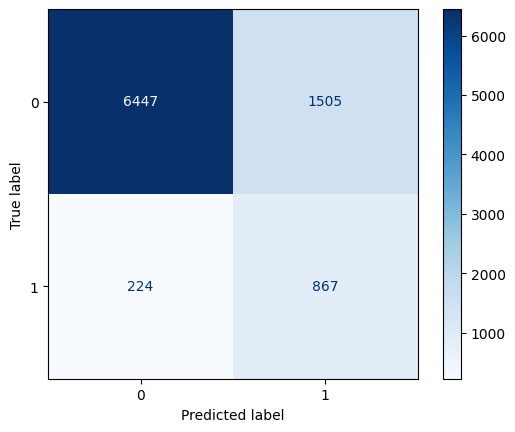

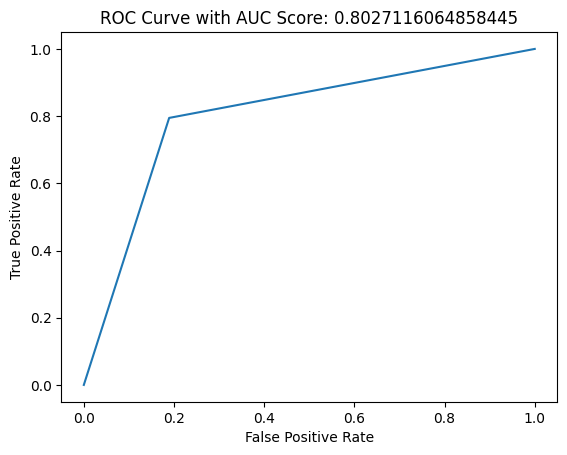

In [71]:
# Predict the test set results
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy: ", accuracy_log_reg)

print(classification_report(y_test, y_pred_log_reg))

# Compute the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Plot the confusion matrix
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=[0, 1])
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.show()

# Plot the ROC curve
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg)
plt.title(f'ROC Curve with AUC Score: {roc_auc_log_reg}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Classification with `Random Forest`

In [72]:
# Initialize the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)



RandomForestClassifier()

Accuracy:  0.8908548048214088
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7952
           1       0.54      0.66      0.59      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.79      0.76      9043
weighted avg       0.90      0.89      0.90      9043



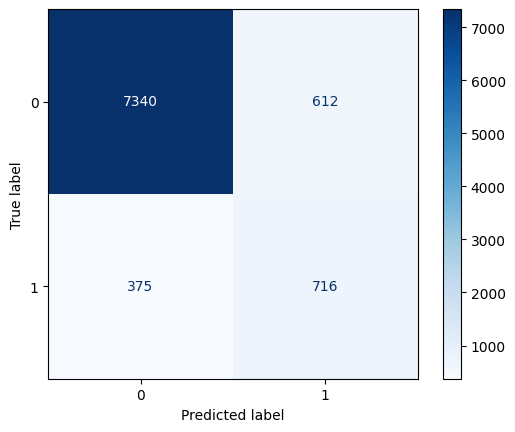

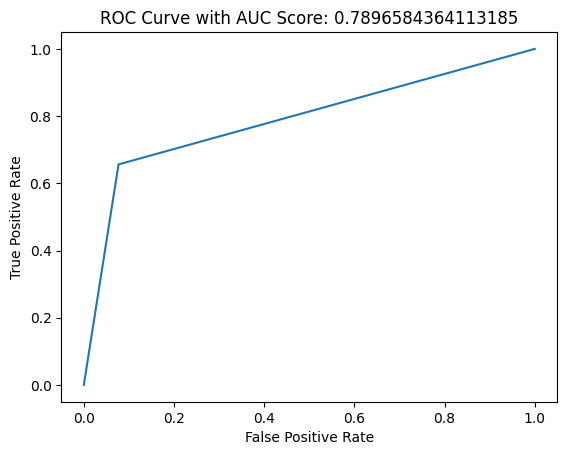

In [73]:
# Predict the test set results
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy: ", accuracy_rf)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Plot the ROC curve
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_rf)
plt.plot(fpr,tpr)
plt.title(f'ROC Curve with AUC Score: {roc_auc_rf}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Classification with `XGBoost`

In [74]:

# Initialize the XGBoost model
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy:  0.9016919163994249
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7952
           1       0.59      0.58      0.59      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.76      0.77      9043
weighted avg       0.90      0.90      0.90      9043



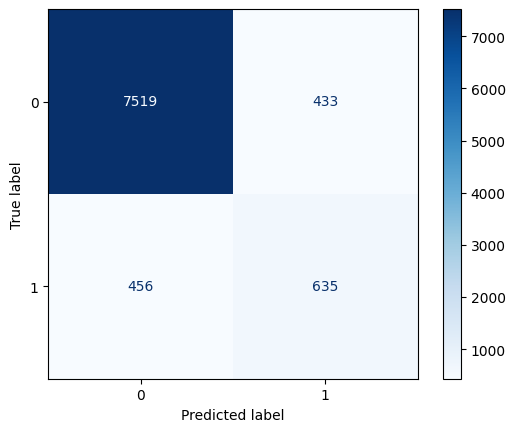

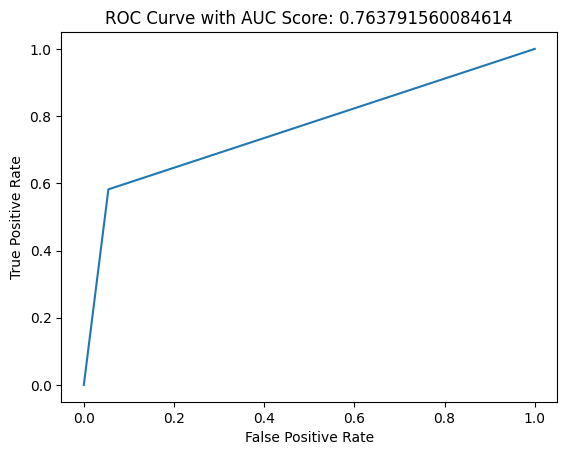

In [75]:
# Predict the test set results
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: ", accuracy_xgb)

print(classification_report(y_test, y_pred_xgb))

# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
disp_xgb.plot(cmap=plt.cm.Blues)
plt.show()

# Plot the ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
plt.plot(fpr_xgb, tpr_xgb)
plt.title(f'ROC Curve with AUC Score: {roc_auc_xgb}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Classification with `Support Vector Machine`

In [76]:

# Initialize the Support Vector Machine model
svm_model = SVC(probability=True)

# Train the model
svm_model.fit(X_train, y_train)


SVC(probability=True)

Accuracy:  0.8255003870396992
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7952
           1       0.39      0.81      0.53      1091

    accuracy                           0.83      9043
   macro avg       0.68      0.82      0.71      9043
weighted avg       0.90      0.83      0.85      9043



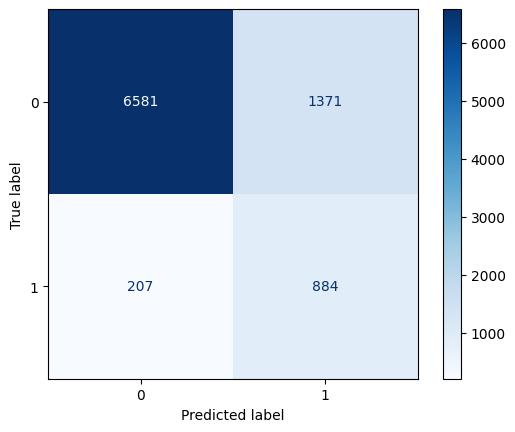

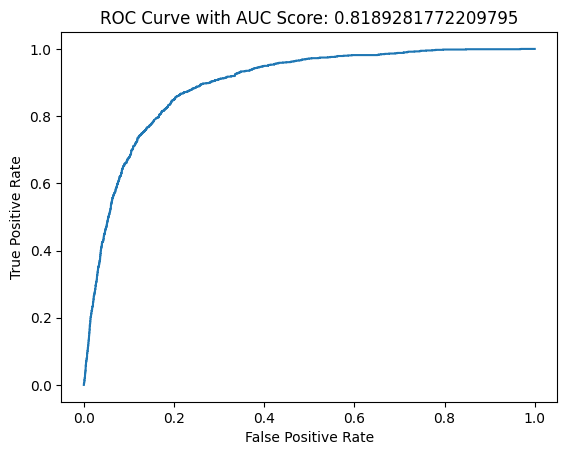

In [77]:
# Predict the test set results
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy: ", accuracy_svm)

print(classification_report(y_test, y_pred_svm))

# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=[0, 1])
disp_svm.plot(cmap=plt.cm.Blues)
plt.show()

# Plot the ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
plt.plot(fpr_svm, tpr_svm)
plt.title(f'ROC Curve with AUC Score: {roc_auc_svm}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Classification with `Artificial Neural Networks`

In [78]:
# Start model building

model = Sequential()

model.add(Dense(60, activation='relu', input_dim=16))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs= 100, validation_data=(X_test, y_test))

Epoch 1/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7338 - loss: 0.5687 - val_accuracy: 0.7757 - val_loss: 0.5404
Epoch 2/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8385 - loss: 0.4113 - val_accuracy: 0.7655 - val_loss: 0.5119
Epoch 3/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8449 - loss: 0.3779 - val_accuracy: 0.8141 - val_loss: 0.4288
Epoch 4/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8501 - loss: 0.3624 - val_accuracy: 0.7815 - val_loss: 0.4698
Epoch 5/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8514 - loss: 0.3553 - val_accuracy: 0.7841 - val_loss: 0.4511
Epoch 6/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8532 - loss: 0.3506 - val_accuracy: 0.8216 - val_loss: 0.3731
Epoch 7/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8564 - loss: 0.3445 - val_accuracy: 0.8371 - val_loss: 0.3674
Epoch 8/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8603 - loss: 0

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 60)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,478 (40.93 KB)

 Trainable params: 3,492 (13.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,986 (27.29 KB)

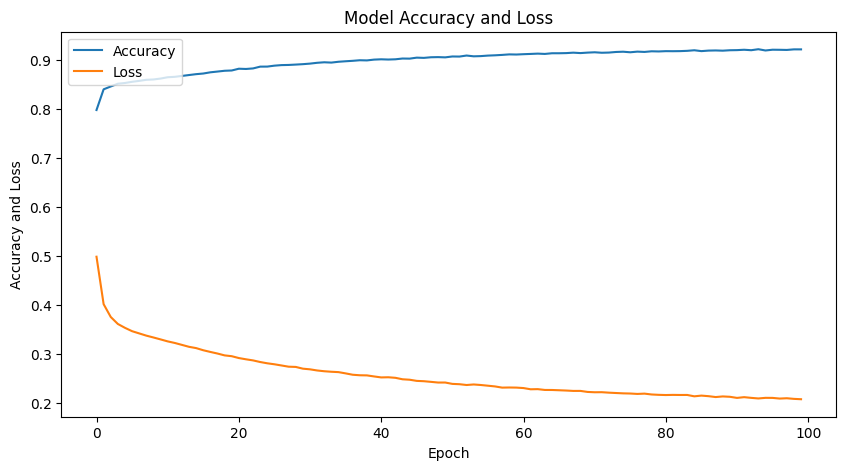

In [ ]:
model_history = model.history.history

plt.figure(figsize = (10,5))
plt.plot(model_history['accuracy'])
plt.plot(model_history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'],loc = 'upper left')
plt.show()

In [ ]:
y_pred_ann = model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0)
accuracy_ann = accuracy_score(y_test,y_pred_ann)
print('Accuracy Score :',accuracy_ann)



print(classification_report(y_test, y_pred_ann))

# Compute the confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Plot the confusion matrix
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=[0, 1])
disp_ann.plot(cmap=plt.cm.Blues)
plt.show()

# Plot the ROC curve
roc_auc_score = roc_auc_score(y_test,y_pred_ann)

fpr,tpr,thresholds = roc_curve(y_test,y_pred_ann)
plt.plot(fpr,tpr)
plt.title(f'ROC Curve with AUC Score: {roc_auc_score}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

  1/283 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
Accuracy Score : 0.8508238416454716


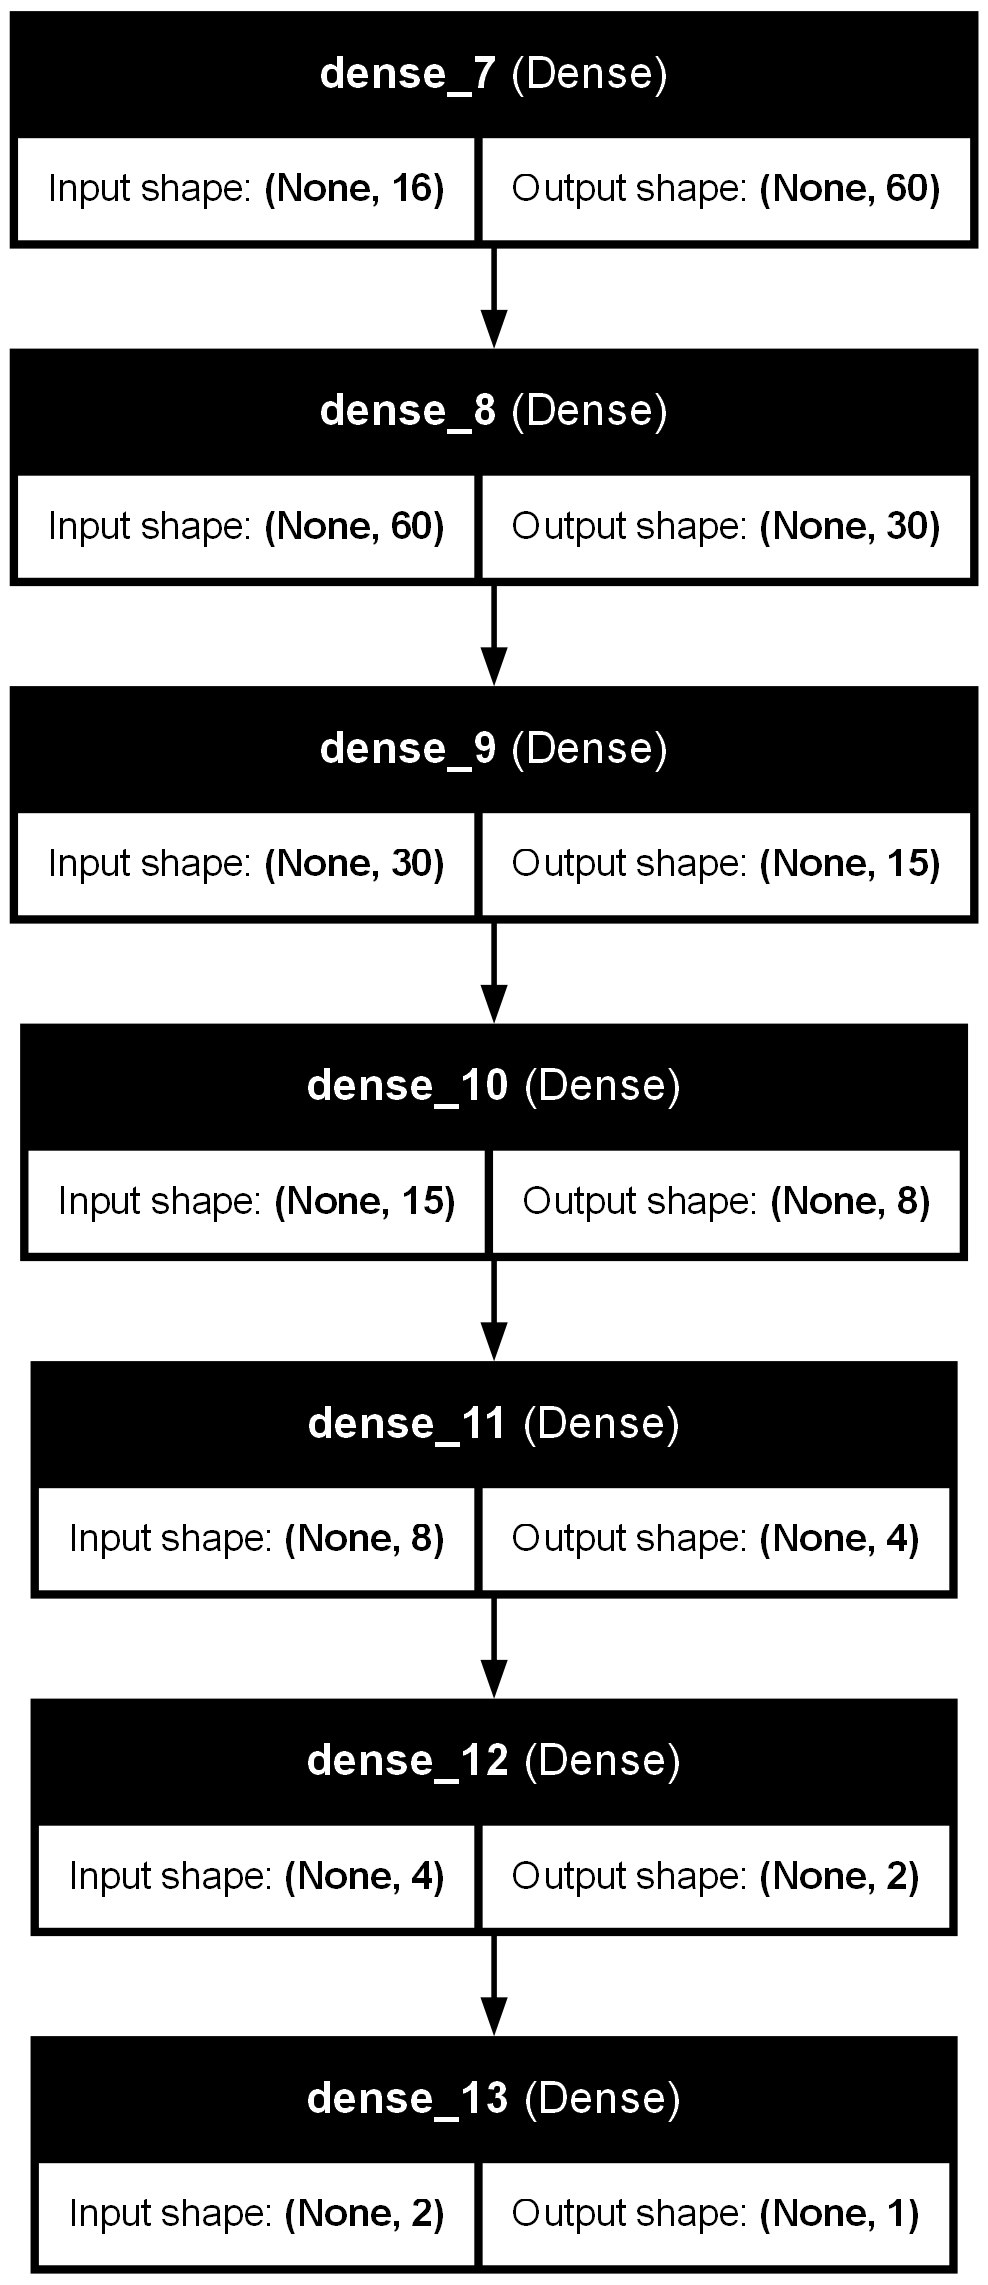

In [85]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
list precision and recall for all models


In [88]:
# Model Comparison df
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'ANN'],
    'Accuracy': [accuracy_log_reg, accuracy_rf, accuracy_xgb, accuracy_svm, accuracy_ann],
    'Precision': [0.88, 0.88, 0.89, 0.89, 0.89],
    'Recall': [0.88, 0.88, 0.89, 0.89, 0.89],
    'AUC': [roc_auc_log_reg, roc_auc_rf, roc_auc_xgb, roc_auc_svm, roc_auc_score]
})

model_comparison

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.808802,0.88,0.88,0.802712
1,Random Forest,0.890855,0.88,0.88,0.789658
2,XGBoost,0.901692,0.89,0.89,0.763792
3,SVM,0.825500,0.89,0.89,0.818928
4,ANN,0.850824,0.89,0.89,0.810788


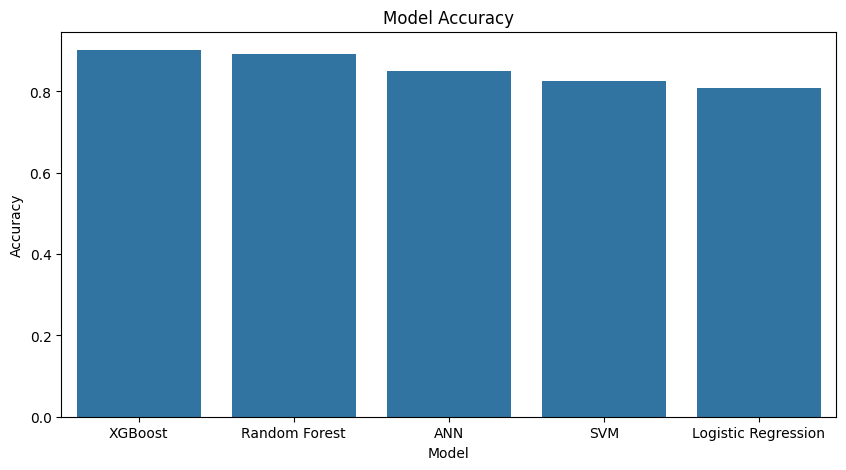

In [93]:
# Classification plotting

plt.figure(figsize=(10, 5))

sns.barplot(x='Model', y='Accuracy', data=model_comparison.sort_values('Accuracy', ascending=False))
plt.title('Model Accuracy')

plt.show()

In [95]:
# Save The Best Model
import joblib
joblib.dump(xgb, 'xgb_model.pkl')

# save scalar preprocessor
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']